In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('covtype.CSV',header=-1)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [4]:
import numpy as np
from bqplot import *
from bqplot.marks import Graph
from ipywidgets import IntSlider, Dropdown, RadioButtons, HBox, VBox, Button, Layout
from bqplot import pyplot as plt1
from bqplot import OrdinalScale

from IPython.display import display

In [5]:
headers=['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways'         
,'Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points','Wilderness_Area_1','Wilderness_Area_2','Wilderness_Area_3','Wilderness_Area_4']

In [6]:
headers_init=['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways'         
,'Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points','Cover_Type']

In [7]:
soiltypes=[]
for i in range(1,41):
    soiltypes.append('Soil_Type_'+str(i))

soiltypes.append('Cover_Type')

In [8]:
for i in range(len(soiltypes)):
    headers.append(soiltypes[i])

In [9]:
data.columns=headers

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Wilderness_Area_1                     581012 non-null int64
Wilderness_Area_2                     581012 non-null int64
Wilderness_Area_3                     581012 non-null int64
Wilderness_Area_4                     581012 non-null int64
Soil_Type_1                           581012 non-

In [11]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [12]:
data['Cover_Type'].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data.Cover_Type)

In [15]:
train.shape

(406708, 55)

In [16]:
test.shape

(174304, 55)

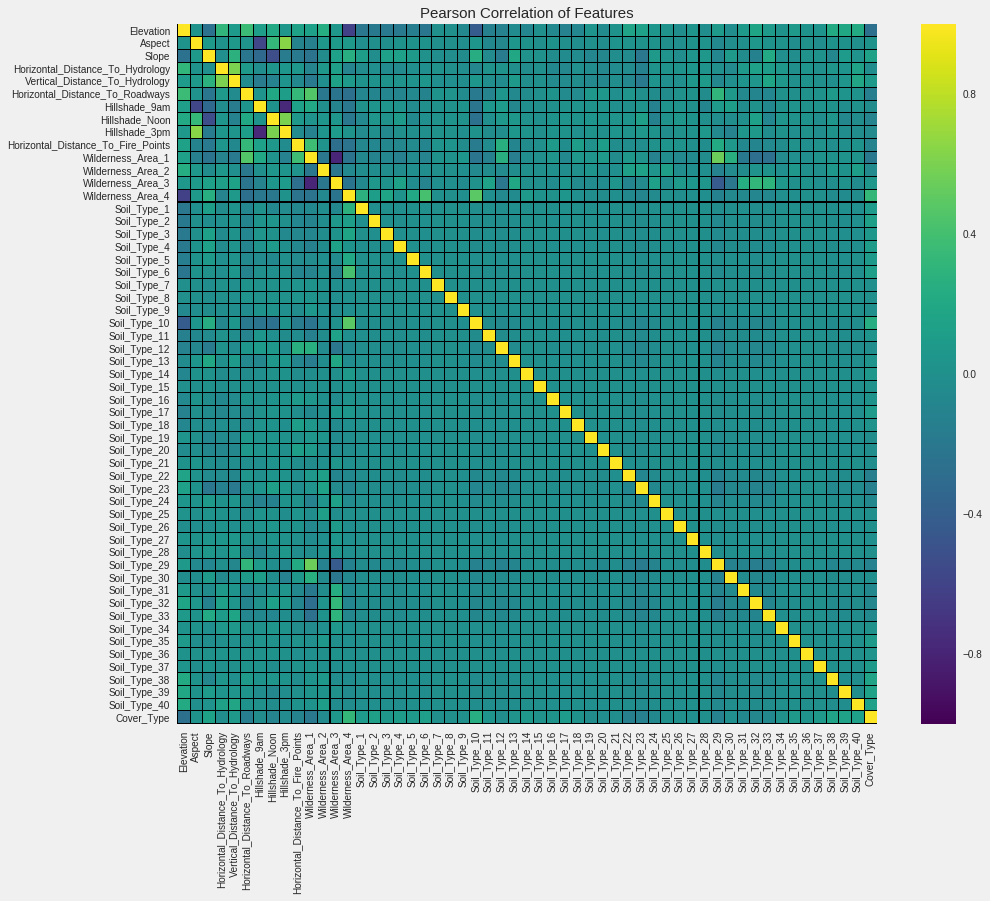

In [17]:
import matplotlib.style as style
style.use('fivethirtyeight')
colormap = plt.cm.viridis
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.0, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.05,vmax=1.0, square=True, cmap=colormap, linecolor='black', annot=False)

In [18]:
for col_name in soiltypes:
    if train[col_name].dtype=='int64':
        unique_cat=len(train[col_name].unique())
        print("Feature:- {col_name} has {unique_cat} unique categories".format(col_name=col_name,unique_cat=unique_cat))

Feature:- Soil_Type_1 has 2 unique categories
Feature:- Soil_Type_2 has 2 unique categories
Feature:- Soil_Type_3 has 2 unique categories
Feature:- Soil_Type_4 has 2 unique categories
Feature:- Soil_Type_5 has 2 unique categories
Feature:- Soil_Type_6 has 2 unique categories
Feature:- Soil_Type_7 has 2 unique categories
Feature:- Soil_Type_8 has 2 unique categories
Feature:- Soil_Type_9 has 2 unique categories
Feature:- Soil_Type_10 has 2 unique categories
Feature:- Soil_Type_11 has 2 unique categories
Feature:- Soil_Type_12 has 2 unique categories
Feature:- Soil_Type_13 has 2 unique categories
Feature:- Soil_Type_14 has 2 unique categories
Feature:- Soil_Type_15 has 2 unique categories
Feature:- Soil_Type_16 has 2 unique categories
Feature:- Soil_Type_17 has 2 unique categories
Feature:- Soil_Type_18 has 2 unique categories
Feature:- Soil_Type_19 has 2 unique categories
Feature:- Soil_Type_20 has 2 unique categories
Feature:- Soil_Type_21 has 2 unique categories
Feature:- Soil_Type_22

In [19]:
#Remove Constant columns
train_cons = []
test_cons=[]
for col in train.columns:
    if train[col].std() == 0:
        train_cons.append(col)
        test_cons.append(col)

train=train.drop(train_cons,axis=1)
test=test.drop(test_cons,axis=1)

In [20]:
def feature_engineering(data2,train_cons):
    
    
    data = data2
    
    data['Ele_minus_VDtHyd'] = data.Elevation-data.Vertical_Distance_To_Hydrology
         
    data['Ele_plus_VDtHyd'] = data.Elevation+data.Vertical_Distance_To_Hydrology
     
    data['Distanse_to_Hydrology'] = (data['Horizontal_Distance_To_Hydrology']**2+data['Vertical_Distance_To_Hydrology']**2)**0.5
     
    data['Hydro_plus_Fire'] = data['Horizontal_Distance_To_Hydrology']+data['Horizontal_Distance_To_Fire_Points']
     
    data['Hydro_minus_Fire'] = data['Horizontal_Distance_To_Hydrology']-data['Horizontal_Distance_To_Fire_Points']
     
    data['Hydro_plus_Road'] = data['Horizontal_Distance_To_Hydrology']+data['Horizontal_Distance_To_Roadways']
     
    data['Hydro_minus_Road'] = data['Horizontal_Distance_To_Hydrology']-data['Horizontal_Distance_To_Roadways']
     
    data['Fire_plus_Road'] = data['Horizontal_Distance_To_Fire_Points']+data['Horizontal_Distance_To_Roadways']
     
    data['Fire_minus_Road'] = data['Horizontal_Distance_To_Fire_Points']-data['Horizontal_Distance_To_Roadways']
    
    #data['Soil']=0
    #for i in range(1,41):
    #    if ('Soil_Type_'+str(i)) not in train_cons:
    #        data['Soil']=data['Soil']+i*data['Soil_Type_'+str(i)]
      
     
    #data['Wilderness_Area']=0
    #for i in range(1,5):
    #    data['Wilderness_Area']=data['Wilderness_Area']+i*data['Wilderness_Area_'+str(i)]
      
    return data

In [21]:
train_df = feature_engineering(train,train_cons)
test_df = feature_engineering(test,train_cons)

In [22]:
def get_features():
    return ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points',
    'Ele_minus_VDtHyd','Ele_plus_VDtHyd','Distanse_to_Hydrology','Hydro_plus_Fire','Hydro_minus_Fire','Hydro_plus_Road',
    'Hydro_minus_Road','Fire_plus_Road','Fire_minus_Road']

In [23]:
features_imp=get_features()
for i in range(1,41):
    features_imp.append('Soil_Type_'+str(i))
for j in range(1,5):
    features_imp.append('Wilderness_Area_'+str(j))

In [24]:
X_train=train_df[features_imp]
X_test=test_df[features_imp]

In [25]:
Y_train=train_df[['Cover_Type']]
Y_test=test_df[['Cover_Type']]

In [26]:
X_train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4
15190,2736,4,15,60,17,3064,200,211,147,6249,...,0,0,0,0,0,0,1,0,0,0
560331,2600,195,33,256,115,1074,195,245,161,1050,...,0,0,0,0,0,0,0,0,1,0
323159,2922,123,13,192,48,1530,241,230,115,2078,...,0,0,0,0,0,0,0,0,1,0
349637,3111,291,8,446,45,2355,197,239,181,2491,...,0,0,0,0,0,0,0,0,1,0
137117,2760,18,5,330,9,1806,216,229,150,698,...,0,0,0,0,0,0,1,0,0,0


In [27]:
Y_train=Y_train-1
Y_test=Y_test-1

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
features_num=get_features()

In [30]:
X_train_num_Scld=StandardScaler().fit_transform(X_train[features_num])

In [31]:
len(features_num)

19

In [32]:
X_train.loc[:,:len(features_num)]=X_train_num_Scld

/home/namanda/anaconda3.6/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406708 entries, 15190 to 269194
Data columns (total 63 columns):
Elevation                             406708 non-null float64
Aspect                                406708 non-null float64
Slope                                 406708 non-null float64
Horizontal_Distance_To_Hydrology      406708 non-null float64
Vertical_Distance_To_Hydrology        406708 non-null float64
Horizontal_Distance_To_Roadways       406708 non-null float64
Hillshade_9am                         406708 non-null float64
Hillshade_Noon                        406708 non-null float64
Hillshade_3pm                         406708 non-null float64
Horizontal_Distance_To_Fire_Points    406708 non-null float64
Ele_minus_VDtHyd                      406708 non-null float64
Ele_plus_VDtHyd                       406708 non-null float64
Distanse_to_Hydrology                 406708 non-null float64
Hydro_plus_Fire                       406708 non-null float64
Hydro_minus_Fire 

In [34]:
X_test_num_Scld=StandardScaler().fit_transform(X_test[features_num])

In [35]:
len(features_num)

19

In [36]:
X_test.loc[:,:len(features_num)]=X_test_num_Scld

/home/namanda/anaconda3.6/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [37]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174304 entries, 3990 to 469778
Data columns (total 63 columns):
Elevation                             174304 non-null float64
Aspect                                174304 non-null float64
Slope                                 174304 non-null float64
Horizontal_Distance_To_Hydrology      174304 non-null float64
Vertical_Distance_To_Hydrology        174304 non-null float64
Horizontal_Distance_To_Roadways       174304 non-null float64
Hillshade_9am                         174304 non-null float64
Hillshade_Noon                        174304 non-null float64
Hillshade_3pm                         174304 non-null float64
Horizontal_Distance_To_Fire_Points    174304 non-null float64
Ele_minus_VDtHyd                      174304 non-null float64
Ele_plus_VDtHyd                       174304 non-null float64
Distanse_to_Hydrology                 174304 non-null float64
Hydro_plus_Fire                       174304 non-null float64
Hydro_minus_Fire  

/home/namanda/anaconda3.6/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


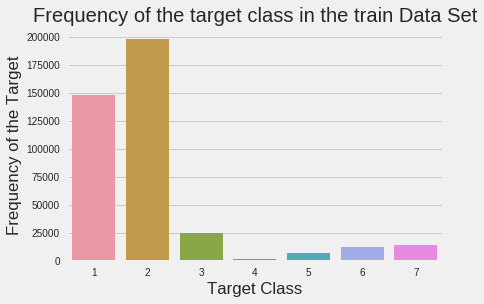

In [38]:
ax=sns.countplot(x='Cover_Type', data=train_df);
total=float(len(data))
plt.title('Frequency of the target class in the train Data Set')
plt.ylabel('Frequency of the Target')
plt.xlabel('Target Class')

/home/namanda/anaconda3.6/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


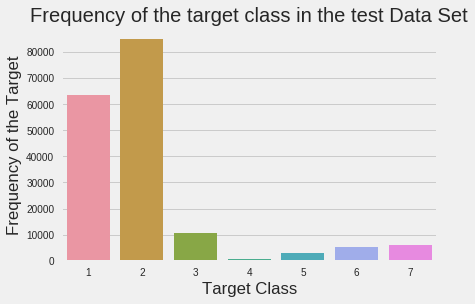

In [39]:
ax=sns.countplot(x='Cover_Type', data=test_df);
total=float(len(data))
plt.title('Frequency of the target class in the test Data Set')
plt.ylabel('Frequency of the Target')
plt.xlabel('Target Class')

# Without Noise

In [40]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

import tensorflow as tf
from keras.layers import Dense, Dropout, Flatten,BatchNormalization
from keras.optimizers import SGD,Adam
import keras.backend as K
import keras.callbacks
from keras import regularizers

/home/namanda/anaconda3.6/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [41]:
import tensorflow as tf
#config = tf.ConfigProto()
#config.gpu_options.allow_growth = True
#sess = tf.Session(config=config)
sess = tf.InteractiveSession()
K.set_session(sess)

In [42]:
tf.__version__

'1.6.0-rc1'

In [43]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score
## Utility functions for model evaluation.
def eval_preds(y_true, y_probs, y_preds):
    return {'precision': precision_score(y_true, y_preds),
            'accuracy': accuracy_score(y_true, y_preds),
            'recall': recall_score(y_true, y_preds),
            'auc': roc_auc_score(y_true, y_probs)}

def get_model_eval(true_train, train_predictions, true_test=None, test_predictions=None):
    train_eval = eval_preds(true_train, *train_predictions)
    if true_test is None:
        return pd.Series(train_eval)
    else:
        test_eval = eval_preds(true_test, *test_predictions)
        return pd.DataFrame([train_eval, test_eval], index=['Train', 'Test'])

def probas_to_classes(probas):
    return (probas >= 0.5).astype(float)

In [44]:
X_train_r,X_valid,Y_train_r,Y_valid=train_test_split(X_train,Y_train,test_size=0.1,random_state=0,stratify=Y_train.Cover_Type)

In [45]:
sample_weights = np.ones(X_train_r.shape[0])

## callback to compute the gradients
class WeightsGradientsCallback(keras.callbacks.Callback):
    def __init__(self):
        self.gradients = []
        self.train_auc = []
        self.test_auc = []
        self.weights = []
    
    def on_epoch_end(self, epoch, logs={}):
        input_values = [X_train_r, sample_weights, Y_train_r.values.reshape(-1, 1), 0]
        gradient_values = compute_gradients(input_values)
        self.gradients.append(gradient_values)
        
        #self.train_auc.append(roc_auc_score(y_train.values.flatten(), 
        #                                    self.model.predict(X_train_norm)))
        #self.test_auc.append(roc_auc_score(y_test.values.flatten(), 
        #                                   self.model.predict(X_test_norm)))
        
        #auc_line.x = np.arange(0, epoch + 1)
        #auc_line.y = [self.train_auc, self.test_auc]
        
        weights = list(range(len(self.model.layers)))
        for i, l in enumerate(self.model.layers):
            weights[i] = l.get_weights()
        self.weights.append(weights)
        
class LayerEvalsCallsback(keras.callbacks.Callback):
    def __init__(self):
        self.train_activs = []
        self.test_activs = []
        
    def on_epoch_end(self, epoch, logs={}):
        train_activs = layer_evaluator([X_train_r, 1.])
        test_activs = layer_evaluator([X_test, 1.])
        
        self.train_activs.append(train_activs)
        self.test_activs.append(test_activs)

weights_callback = WeightsGradientsCallback()
activs_callback = LayerEvalsCallsback()

In [46]:
Y_train.shape

(406708, 1)

In [47]:
nb_classes=7
l1_num_neuron=50
l2_num_neuron=30
l3_num_neuron=20
l4_num_neuron=10
#l5_num_neuron=100
output_neuron=nb_classes

In [48]:
layer_1 = Dense(l1_num_neuron, activation='relu',kernel_regularizer=regularizers.l2(0.01), input_dim=X_train.shape[1])
layer_2 = Dense(l2_num_neuron, activation='relu',kernel_regularizer=regularizers.l2(0.01))
layer_3 = Dense(l3_num_neuron, activation='relu',kernel_regularizer=regularizers.l2(0.01))
layer_4 = Dense(l4_num_neuron, activation='relu',kernel_regularizer=regularizers.l2(0.01))
layer_out = Dense(output_neuron, activation='softmax',kernel_regularizer=regularizers.l2(0.01))

In [49]:
mlp=Sequential()
mlp.add(layer_1)
mlp.add(Dropout(0.1))
mlp.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.01))
mlp.add(layer_2)
mlp.add(Dropout(0.3))
mlp.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.01))
mlp.add(layer_3)
mlp.add(Dropout(0.2))
mlp.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.01))
mlp.add(layer_4)
mlp.add(Dropout(0.2))
mlp.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.01))
#mlp.add(layer_5)
mlp.add(layer_out)

In [50]:
#optim=Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0005)
sgd = SGD(lr=0.01, momentum=0.8, decay=0.1/200, nesterov=True)
mlp.compile(optimizer=sgd,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [51]:
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                3200      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)                200       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1530      
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 30)                120       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                620       
__________

In [52]:
## variables for WeightsGradientsCallback:
gradients = mlp.optimizer.get_gradients(mlp.model.total_loss, 
                                          mlp.trainable_weights)
input_tensors = [mlp.model.inputs[0], mlp.model.sample_weights[0], 
                 mlp.model.targets[0], K.learning_phase()]
compute_gradients = K.function(inputs=input_tensors, outputs=gradients)   

In [53]:
## variables for LayerEvalsCallback
inp = mlp.input                                          
outputs = [layer.output for layer in mlp.layers]         
layer_evaluator = K.function([inp]+ [K.learning_phase()], outputs) 


In [54]:
Y_train_r.shape

(366037, 1)

In [55]:
from keras.callbacks import EarlyStopping
train_res = mlp.fit(X_train_r.values,
                      Y_train_r.values.ravel(),
                      batch_size=300,
                      epochs=50,# sample running 20 epochs
                      verbose=True,
                      validation_data=(X_valid.values,
                                       Y_valid.values.ravel()),
                      callbacks=
                      [EarlyStopping(patience=4,mode='min',
                                     verbose=True),weights_callback, activs_callback]
                      )

Train on 366037 samples, validate on 40671 samples
Epoch 1/50
366037/366037 [==============================] - 17s 46us/step - loss: 1.4702 - acc: 0.6525 - val_loss: 0.9377 - val_acc: 0.7239
Epoch 2/50
366037/366037 [==============================] - 16s 44us/step - loss: 0.8609 - acc: 0.7216 - val_loss: 0.7369 - val_acc: 0.7523
Epoch 3/50
366037/366037 [==============================] - 16s 44us/step - loss: 0.7610 - acc: 0.7369 - val_loss: 0.6722 - val_acc: 0.7680
Epoch 4/50
366037/366037 [==============================] - 16s 44us/step - loss: 0.7247 - acc: 0.7470 - val_loss: 0.6431 - val_acc: 0.7725
Epoch 5/50
366037/366037 [==============================] - 16s 44us/step - loss: 0.7095 - acc: 0.7514 - val_loss: 0.6272 - val_acc: 0.7813
Epoch 6/50
366037/366037 [==============================] - 16s 44us/step - loss: 0.7005 - acc: 0.7547 - val_loss: 0.6263 - val_acc: 0.7783
Epoch 7/50
366037/366037 [==============================] - 16s 44us/step - loss: 0.6932 - acc: 0.7567 - val_

In [56]:
predictions=mlp.predict_classes(X_test.values,verbose=True)

174304/174304 [==============================] - 9s 50us/step


In [62]:
#predictions

In [57]:
def get_activations_hist(epoch, layer, node, data='Train'):
    if data == 'Train':
        activs_array = activs_callback.train_activs
    else:
        activs_array = activs_callback.test_activs
    
    if layer >= 1:
        layer = layer + 1
    layer_activs = activs_array[epoch - 1][layer].T[node]
    return layer_activs

In [58]:
def get_cleaned_weights(weights_mat):
    weights_ret = []
    for w in weights_mat:
        if np.shape(w)[0] == 0:
            # this is a dropout layer or a reg layer which does no have weights
            pass
        else:
            weights_ret.append(w)
    return weights_ret

def get_weights_for_node_at_layer(weights, epoch_num, layer_num, node_num):
    # max_layers = len(weights)
    layer_params = weights[epoch_num][layer_num]
    
    layer_weights = layer_params[0]
    layer_bias = layer_params[1]
    
    node_weights = layer_weights[:, node_num]
    node_bias = layer_bias[node_num]
    
    return (node_bias, node_weights)

def get_gradients_for_node_at_layer(gradients, epoch_num, layer_num, node_num):
    layer_gradients = gradients[epoch_num][2 * layer_num]
    layer_bias_gradients = gradients[epoch_num][2 * layer_num + 1]
    
    node_gradients = layer_gradients[:, node_num]
    node_bias_gradiens = layer_bias_gradients[node_num]
    
    return(node_bias_gradiens, node_gradients)

cleaned_weights = []

for w in weights_callback.weights:
    cleaned_weights.append(get_cleaned_weights(w))

In [59]:
from neural_net import NeuralNet

In [65]:
nn = NeuralNet(num_inputs=X_train_r.shape[1], num_hidden_layers=[50,30,20, 10], num_outputs=7)

epoch_slider = IntSlider(description='Epoch:', min=1, max=31, value=1)
mode_dd = Dropdown(description='View', options=['Weights', 'Gradients', 'Activations'], value='Weights')
update_btn = Button(description='Update')

bar_figure = plt1.figure()
bar_plot = plt1.bar([], [], scales={'x': OrdinalScale()})

hist_figure = plt1.figure(title='Hist')
hist_plot = plt1.hist([], bins=20)

controls = HBox([epoch_slider, mode_dd, update_btn])
nn.graph.tooltip = bar_figure

/home/namanda/anaconda3.6/lib/python3.6/site-packages/bqplot/pyplot.py:603: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  issubdtype(dtype, Scale.scale_types[key].dtype)


In [66]:
def update_bar_chart(layer, node):
    epoch = epoch_slider.value
    
    if mode_dd.value == 'Activations':
        display_vals = get_activations_hist(epoch, layer-1, node)
        hist_plot.sample = display_vals
        nn.graph.tooltip = hist_figure
        hist_figure.title = mode_dd.value + ' for layer:' + str(layer) + ' node: ' + str(node) + ' at epoch: ' + str(epoch)
        return

    if mode_dd.value == 'Weights':
        display_vals = get_weights_for_node_at_layer(cleaned_weights, epoch, layer-1, node)
    elif mode_dd.value == 'Gradients':
        display_vals = get_gradients_for_node_at_layer(weights_callback.gradients, epoch, layer-1, node)
        
    return_vals = np.append([display_vals[0]], display_vals[1])
    
    bar_figure.title = mode_dd.value + ' for layer:' + str(layer) + ' node: ' + str(node) + ' at epoch: ' + str(epoch)
    bar_plot.x = np.arange(len(return_vals))
    bar_plot.y = return_vals
    
node_counts = [nn.num_inputs] + nn.num_hidden_layers + [nn.nodes_output_layer]

def hovered_change(change):
    point_index = change['new']
    if point_index is None:
        return
    else:
        for i, n in enumerate(node_counts):
            if point_index < n:
                break
            else:
                point_index = point_index - n
        if i > 0:
            update_bar_chart(i, point_index)
    
nn.graph.observe(hovered_change, 'hovered_point')

VBox([controls, nn], layout=Layout(min_height='1500px'))    

VBox(children=(HBox(children=(IntSlider(value=1, description='Epoch:', max=31, min=1), Dropdown(description='View', options=('Weights', 'Gradients', 'Activations'), value='Weights'), Button(description='Update', style=ButtonStyle()))), NeuralNet(fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, layout=Layout(height='800px', min_width='125px', width='900px'), marks=[Graph(colors=['Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange'], directed=False, hovered_style={'stroke': '1.5'}, interactions={'hover': 'tooltip', 'click': 'select'}, link_matrix=array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), link_type='line', node_data=[{'label': 'x1', 'label_display': 'none'}, {'label': 'x2', 'label_display': 'none'}, {'label': 'x3', 'label_display': 'none'}, {'label': 'x4', 'label_display': 'none'}, {'label': 'x5', 'label_display': 'none'}, {'label': 'x6', 'label_display': 'none'}, {'label': 'x7', 'label_display': 'none'}, {'label': 'x8', 'label_display': 'none'}, {'label': 'x9', 'label_display': 'none'}, {'label': 'x10', 'label_display': 'none'}, {'label': 'x11', 'label_display': 'none'}, {'label': 'x12', 'label_display': 'none'}, {'label': 'x13', 'label_display': 'none'}, {'label': 'x14', 'label_display': 'none'}, {'label': 'x15', 'label_display': 'none'}, {'label': 'x16', 'label_display': 'none'}, {'label': 'x17', 'label_display': 'none'}, {'label': 'x18', 'label_display': 'none'}, {'label': 'x19', 'label_display': 'none'}, {'label': 'x20', 'label_display': 'none'}, {'label': 'x21', 'label_display': 'none'}, {'label': 'x22', 'label_display': 'none'}, {'label': 'x23', 'label_display': 'none'}, {'label': 'x24', 'label_display': 'none'}, {'label': 'x25', 'label_display': 'none'}, {'label': 'x26', 'label_display': 'none'}, {'label': 'x27', 'label_display': 'none'}, {'label': 'x28', 'label_display': 'none'}, {'label': 'x29', 'label_display': 'none'}, {'label': 'x30', 'label_display': 'none'}, {'label': 'x31', 'label_display': 'none'}, {'label': 'x32', 'label_display': 'none'}, {'label': 'x33'

IndexError: too many indices for array

IndexError: too many indices for array

IndexError: too many indices for array

IndexError: too many indices for array

IndexError: too many indices for array

IndexError: too many indices for array

IndexError: too many indices for array

IndexError: too many indices for array

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test.values.ravel(),predictions)

0.93290458050302916

In [ ]:
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

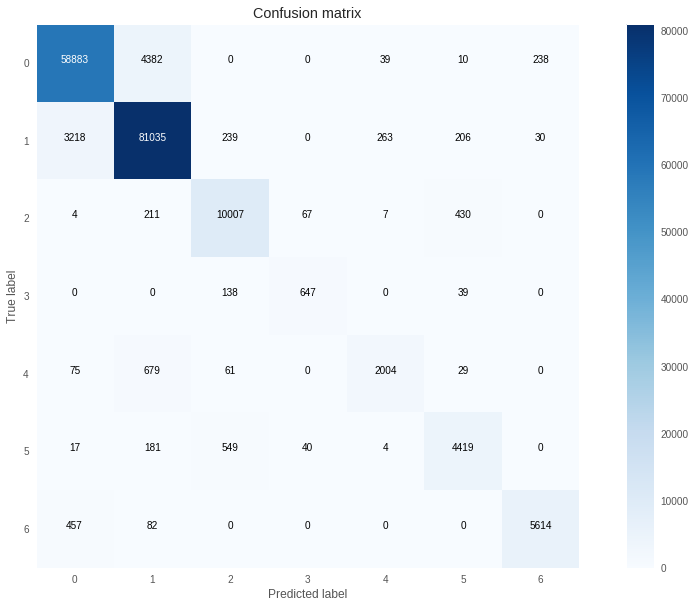

In [135]:
cnf_matrix = confusion_matrix(Y_test,predictions)
np.set_printoptions(precision=2)

#print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1,2,3,4,5,6]
plt.figure(figsize=(15, 10))
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.grid('off')
plt.show()

# Noise conisderation

In [51]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

import tensorflow as tf
from keras.layers import Dense, Dropout, Flatten,BatchNormalization
from keras.optimizers import SGD,Adam
import keras.backend as K
import keras.callbacks
from keras import regularizers

In [52]:
plt.style.use('ggplot')

In [53]:
NOISE_LEVEL=0.3  # what part of training labels are permuted
#perm = np.array([6, 0, 4, 2, 1, 3, 5])  # noise permutation (from Reed)

In [54]:
Y_train=train_df['Cover_Type']-1

In [55]:
Y_test=test_df['Cover_Type']-1

In [56]:
#noise = perm[Y_train]

In [57]:
seed=0
nb_classes = 7

In [58]:
#X_train=X_train_red_rf_features

In [59]:
n_train_data,dim=X_train.shape
n_test_data,dim_test=X_test.shape
Y_train=Y_train.values.reshape(n_train_data,1)
Y_test=Y_test.values.reshape(n_test_data,1)

In [60]:
nhiddens = [500,300,200,100]
DROPOUT=0.3
#opt='adam'
batch_size = 300
patience = 4  # Early stopping patience
epochs = 400  # number of epochs to train on

In [61]:
def castLabel(y, t):
    if -1 in y:
        if t == -1:
            y_new = y
        elif t == 0:
            y_new = np.divide((y + 1) ,2)
        elif t == 2:
            y_new = np.divide((y + 3),2)
    elif 0 in y:
        if (t == -1):
            y_new = (y * 2) - 1
        elif (t == 0):
            y_new = y
        elif (t == 2):
            y_new = y + 1
    elif 2 in y:
        if (t == -1):
            y_new = (y * 2) - 3
        elif (t == 0):
            y_new = y - 1
        elif (t == 2):
            y_new = y
    return y_new

In [62]:
def injectLabelNoise(y,flipRate):
    fd  =  -np.ones((y.shape))
    yz  =  castLabel(y,-1)
    y   =  castLabel(y,2)
    # sampling some numbers
    for i in range(0,2):
        prob    = np.random.rand(y.shape[0],1)
        idx     = np.where((y==i+1) & (prob <= flipRate[i]))
        #print(idx)
        yz[idx[0]] = -yz[idx[0]]
        fd[idx[0]] = -fd[idx[0]]
    yz = castLabel(yz,2)
    return yz, fd

In [63]:
yz, fd=injectLabelNoise(Y_train, [0.2,0.2,0.2,0.3,0.2,0.05,0.05])
yz=castLabel(yz,0)

In [64]:
NOISE= round(1. - np.mean(yz == Y_train),2)

In [65]:
NOISE

0.17000000000000001

In [66]:
Y_train_noise=yz

In [67]:
Y_train_noise=Y_train_noise.flatten()

/home/namanda/anaconda3.6/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


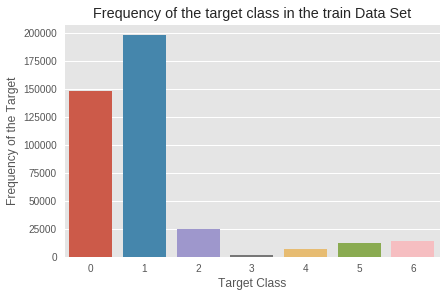

In [68]:
Y_train_df=pd.DataFrame(Y_train,columns=['Cover_Type'])
ax=sns.countplot(x='Cover_Type', data=Y_train_df);
total=float(len(data))
plt.title('Frequency of the target class in the train Data Set')
plt.ylabel('Frequency of the Target')
plt.xlabel('Target Class')

/home/namanda/anaconda3.6/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


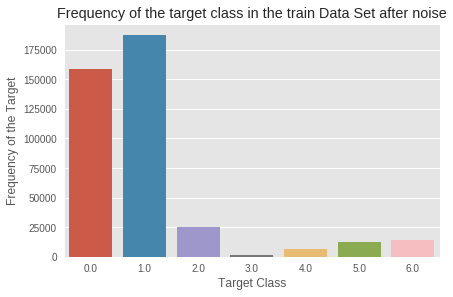

In [69]:
Y_train_df_noise=pd.DataFrame(Y_train_noise,columns=['Cover_Type'])
ax=sns.countplot(x='Cover_Type', data=Y_train_df_noise);
total=float(len(data))
plt.title('Frequency of the target class in the train Data Set after noise')
plt.ylabel('Frequency of the Target')
plt.xlabel('Target Class')

In [70]:
from sklearn.model_selection import StratifiedShuffleSplit
#_, noise_idx = next(iter(StratifiedShuffleSplit(n_splits=1,
#                                                test_size=NOISE_LEVEL,
#                                                random_state=seed).split(X_train,Y_train.ravel())))
#Y_train_noise = Y_train.copy()
#noise=noise.reshape(n_train_data,1)
#Y_train_noise[noise_idx] = noise[noise_idx]

In [71]:
#1. - np.mean(Y_train_noise == Y_train)

In [73]:
# break the training set to 10% validation which we will use for early stopping.
train_idx, val_idx = next(iter(
        StratifiedShuffleSplit(n_splits=1, test_size=0.1,
                               random_state=0).split(X_train, Y_train_noise))) #.values
X_train=X_train.values
X_train_train = X_train[train_idx]
Y_train_train = Y_train_noise[train_idx]
X_train_val = X_train[val_idx]
Y_train_val = Y_train_noise[val_idx]

In [74]:
from keras import regularizers
from keras.models import Sequential
hidden_layers = Sequential(name='hidden')

In [75]:
from keras.layers import Dense, Dropout, Activation
for i, nhidden in enumerate(nhiddens):
    hidden_layers.add(Dense(nhidden,kernel_regularizer=regularizers.l2(0.01),
                            input_shape=(X_train.shape[1],) if i == 0 else []))
    hidden_layers.add(Activation('relu'))
    hidden_layers.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.01))
    hidden_layers.add(Dropout(DROPOUT))

In [76]:
from keras.layers import Input
train_inputs = Input(shape=(X_train.shape[1],))

In [77]:
last_hidden = hidden_layers(train_inputs)
baseline_output = Dense(nb_classes, activation='softmax', name='baseline',kernel_regularizer=regularizers.l2(0.01))(last_hidden)

In [78]:
from keras.models import Model
sgd = SGD(lr=0.01, momentum=0.8, decay=0.1/200, nesterov=True)
model = Model(inputs=train_inputs, outputs=baseline_output)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [79]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 63)                0         
_________________________________________________________________
hidden (Sequential)          (None, 100)               267000    
_________________________________________________________________
baseline (Dense)             (None, 7)                 707       
Total params: 267,707
Trainable params: 265,507
Non-trainable params: 2,200
_________________________________________________________________


In [80]:
def eval(model,y_test=Y_test):
    return dict(zip(model.metrics_names,model.evaluate(X_test.values,y_test, verbose=False)))

In [81]:
eval(model)

{'acc': 0.11092114925647145, 'loss': 10.626812775550423}

In [82]:
from keras.callbacks import EarlyStopping
train_res = model.fit(X_train_train,
                      Y_train_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=True,
                      validation_data=(X_train_val,
                                       Y_train_val),
                      callbacks=
                      [EarlyStopping(patience=patience,mode='min',
                                     verbose=True)]
                      )

Train on 366037 samples, validate on 40671 samples
Epoch 1/400
366037/366037 [==============================] - 20s 55us/step - loss: 4.5075 - acc: 0.6085 - val_loss: 2.0609 - val_acc: 0.6461
Epoch 2/400
366037/366037 [==============================] - 14s 39us/step - loss: 1.4802 - acc: 0.6463 - val_loss: 1.0968 - val_acc: 0.6661
Epoch 3/400
366037/366037 [==============================] - 15s 40us/step - loss: 0.9844 - acc: 0.6575 - val_loss: 0.8598 - val_acc: 0.6789
Epoch 4/400
366037/366037 [==============================] - 14s 37us/step - loss: 0.8429 - acc: 0.6683 - val_loss: 0.7773 - val_acc: 0.6893
Epoch 5/400
366037/366037 [==============================] - 14s 37us/step - loss: 0.7890 - acc: 0.6759 - val_loss: 0.7391 - val_acc: 0.6966
Epoch 6/400
366037/366037 [==============================] - 14s 38us/step - loss: 0.7610 - acc: 0.6832 - val_loss: 0.7156 - val_acc: 0.7051
Epoch 7/400
366037/366037 [==============================] - 13s 37us/step - loss: 0.7451 - acc: 0.6878

In [83]:
eval(model)

{'acc': 0.89070818799339091, 'loss': 0.46638670916598457}

In [84]:
ybaseline_predict = model.predict(X_train,batch_size=batch_size)

In [85]:
ybaseline_predict = np.argmax(ybaseline_predict, axis=-1)

In [86]:
ybaseline_predict=ybaseline_predict.reshape(ybaseline_predict.shape[0],1)

In [133]:
ybaseline_predict.shape

(406708, 1)

In [87]:
Y_train_noise=Y_train_noise.flatten()

In [88]:
Y_train_noise=pd.DataFrame(Y_train_noise,columns=['Cover_Type'])

In [89]:
Y_train_noise=Y_train_noise.astype('int')

In [90]:
Y_train_noise.head()

,Cover_Type
0,0
1,1
2,1
3,1
4,1


In [91]:
baseline_confusion = np.zeros((nb_classes, nb_classes))
for n, p in zip(Y_train_noise.values.ravel(), ybaseline_predict):
    baseline_confusion[p, n] += 1.

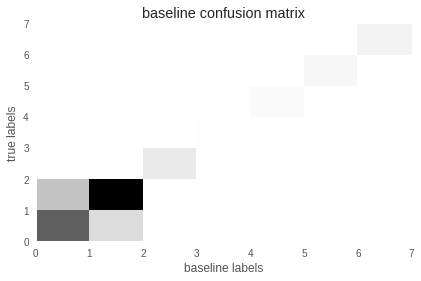

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline
# perm_bias_weights.astype(int)
plt.pcolor(baseline_confusion)
plt.ylabel('true labels')
plt.xlabel('baseline labels')
plt.title('baseline confusion matrix');

In [93]:
BETA = 0

In [94]:
#baseline_confusion

In [95]:
channel_weights = baseline_confusion.copy()
#channel_weights=channel_weights + 1e-8
channel_weights /= channel_weights.sum(axis=1, keepdims=True)
# perm_bias_weights[prediction,noisy_label] = log(P(noisy_label|prediction))
channel_weights = np.log(channel_weights+1e-8)

In [96]:
from channel import Channel
channeled_output = Channel(name='channel',weights=[channel_weights],kernel_regularizer=regularizers.l2(0.01))(baseline_output)

In [97]:
if BETA ==1:
    simple_model = Model(inputs=train_inputs, outputs=[baseline_output])
    simple_model.compile(loss='sparse_categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
else:
    simple_model = Model(inputs=train_inputs, outputs=[channeled_output, baseline_output])
    simple_model.compile(loss='sparse_categorical_crossentropy',loss_weights=[1.-BETA, BETA],optimizer=sgd,metrics=['accuracy'])

In [98]:
simple_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 63)                0         
_________________________________________________________________
hidden (Sequential)          (None, 100)               267000    
_________________________________________________________________
baseline (Dense)             (None, 7)                 707       
_________________________________________________________________
channel (Channel)            (None, 7)                 49        
Total params: 267,756
Trainable params: 265,556
Non-trainable params: 2,200
_________________________________________________________________


In [99]:
train_res = simple_model.fit(X_train_train,
                      [Y_train_train,Y_train_train],
                      batch_size=batch_size,
                      epochs=100,
                      verbose=True,
                      validation_data=(X_train_val,
                                       [Y_train_val,Y_train_val]),
                      callbacks=
                      [EarlyStopping(patience=3,mode='min',verbose=True)]
                      )

Train on 366037 samples, validate on 40671 samples
Epoch 1/100
366037/366037 [==============================] - 24s 66us/step - loss: 54.6446 - channel_loss: 0.6143 - baseline_loss: 0.6045 - channel_acc: 0.7340 - baseline_acc: 0.7341 - val_loss: 53.6455 - val_channel_loss: 0.5786 - val_baseline_loss: 0.5823 - val_channel_acc: 0.7554 - val_baseline_acc: 0.7553
Epoch 2/100
366037/366037 [==============================] - 20s 53us/step - loss: 52.7408 - channel_loss: 0.6073 - baseline_loss: 0.6353 - channel_acc: 0.7353 - baseline_acc: 0.7353 - val_loss: 51.7889 - val_channel_loss: 0.5766 - val_baseline_loss: 0.6059 - val_channel_acc: 0.7544 - val_baseline_acc: 0.7541
Epoch 3/100
366037/366037 [==============================] - 16s 45us/step - loss: 50.9251 - channel_loss: 0.6055 - baseline_loss: 0.6547 - channel_acc: 0.7359 - baseline_acc: 0.7360 - val_loss: 50.0116 - val_channel_loss: 0.5747 - val_baseline_loss: 0.6219 - val_channel_acc: 0.7571 - val_baseline_acc: 0.7571
Epoch 4/100
3660

366037/366037 [==============================] - 13s 36us/step - loss: 12.4550 - channel_loss: 0.6786 - baseline_loss: 0.7233 - channel_acc: 0.7389 - baseline_acc: 0.7393 - val_loss: 12.2867 - val_channel_loss: 0.6520 - val_baseline_loss: 0.6817 - val_channel_acc: 0.7593 - val_baseline_acc: 0.7599
Epoch 54/100
366037/366037 [==============================] - 14s 38us/step - loss: 12.1764 - channel_loss: 0.6800 - baseline_loss: 0.7238 - channel_acc: 0.7397 - baseline_acc: 0.7397 - val_loss: 12.0130 - val_channel_loss: 0.6534 - val_baseline_loss: 0.6783 - val_channel_acc: 0.7598 - val_baseline_acc: 0.7600
Epoch 55/100
366037/366037 [==============================] - 14s 39us/step - loss: 11.9075 - channel_loss: 0.6814 - baseline_loss: 0.7250 - channel_acc: 0.7399 - baseline_acc: 0.7402 - val_loss: 11.7492 - val_channel_loss: 0.6557 - val_baseline_loss: 0.6840 - val_channel_acc: 0.7590 - val_baseline_acc: 0.7582
Epoch 56/100
366037/366037 [==============================] - 15s 40us/step -

In [100]:
eval(simple_model,y_test=[Y_test,Y_test])

{'baseline_acc': 0.89584863227464662,
 'baseline_loss': 0.2889751662133111,
 'channel_acc': 0.89616991004222513,
 'channel_loss': 0.55929852339003272,
 'loss': 4.9444659412377732}

In [101]:
X_test.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4
3990,-2.940916,-1.176484,0.920171,-1.127079,-0.676873,-0.787048,-0.342117,-1.737584,-0.717244,-0.383433,...,0,0,0,0,0,0,0,0,0,1
269758,-2.905167,-0.675744,0.652874,-0.561127,0.594638,-1.302943,1.075192,-1.079161,-1.526362,-1.054360,...,0,0,0,0,0,0,0,0,0,1
418575,-0.556407,1.577588,0.118281,-0.443220,-0.401952,-0.043006,-1.050771,-0.167499,0.848791,-0.728719,...,0,0,0,0,0,0,0,0,1,0
227405,-1.014004,1.121557,3.192193,1.240486,2.897103,-1.001737,-4.407555,-0.522034,2.649731,-0.094058,...,0,0,0,0,0,0,0,0,1,0
540541,1.517079,1.362985,1.722061,-0.363044,0.422812,-0.656312,-2.766461,-0.522034,1.762311,-0.247434,...,0,0,0,0,1,0,0,1,0,0


In [102]:
preds=simple_model.predict(X_test.values)

In [103]:
preds_max=np.argmax(preds[0],axis=-1)

In [104]:
preds_max.shape

(174304,)

In [105]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [106]:
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report

In [107]:
Y_test_df=pd.DataFrame(Y_test,columns=['Cover_Type'])

In [108]:
Y_test_df['Cover_Type'].value_counts()

1    84991
0    63552
2    10726
6     6153
5     5210
4     2848
3      824
Name: Cover_Type, dtype: int64

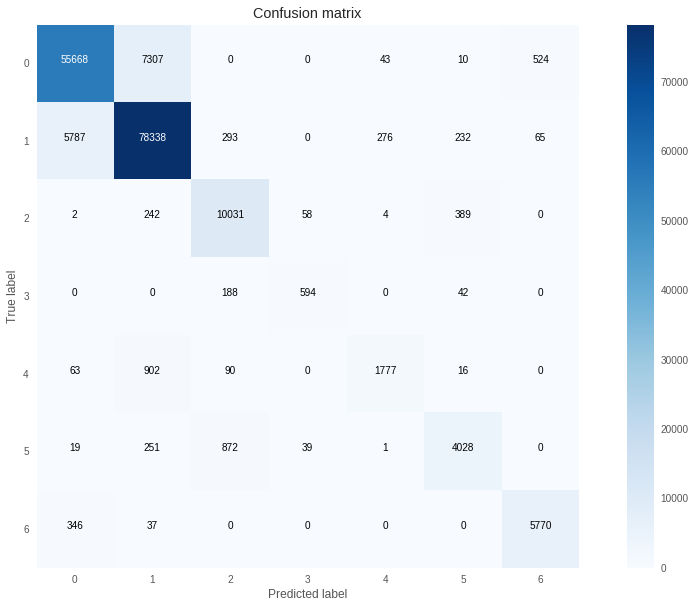

In [128]:
cnf_matrix = confusion_matrix(Y_test,preds_max)
np.set_printoptions(precision=2)

#print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1,2,3,4,5,6]
plt.figure(figsize=(15, 10))
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.grid('off')
plt.show()

In [110]:
from sklearn.metrics import accuracy_score

In [111]:
accuracy_score(Y_test,preds_max.ravel())

0.89616991004222513

In [117]:
from keras.layers import merge
from keras.layers import concatenate
from keras.layers import Dot
from keras.layers import Reshape

In [119]:
channel_matrix = [Dense(nb_classes,activation='softmax',kernel_regularizer=regularizers.l2(0.01),name='dense_class%d'%i,weights=[0.05*(np.random.random((nhidden,nb_classes)) - 0.5),channel_weights[i]])(last_hidden)for i in range(nb_classes)]
channel_matrix = concatenate(channel_matrix)
channel_matrix = Reshape((nb_classes,nb_classes))(channel_matrix)
channeled_output = merge([channel_matrix, baseline_output], mode='dot', dot_axes=(1,1), name='channel')

/home/namanda/anaconda3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  after removing the cwd from sys.path.
/home/namanda/anaconda3.6/lib/python3.6/site-packages/keras/legacy/layers.py:464: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)


In [122]:
if BETA ==1:
    complex_model = Model(inputs=train_inputs, outputs=[baseline_output])
    complex_model.compile(loss='sparse_categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
else:
    complex_model = Model(inputs=train_inputs, outputs=[channeled_output, baseline_output])
    complex_model.compile(loss='sparse_categorical_crossentropy',loss_weights=[1.-BETA, BETA],optimizer=sgd,metrics=['accuracy'])

In [123]:
complex_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 63)           0                                            
__________________________________________________________________________________________________
hidden (Sequential)             (None, 100)          267000      input_1[0][0]                    
__________________________________________________________________________________________________
dense_class0 (Dense)            (None, 7)            707         hidden[1][0]                     
__________________________________________________________________________________________________
dense_class1 (Dense)            (None, 7)            707         hidden[1][0]                     
__________________________________________________________________________________________________
dense_clas

In [124]:
train_res_complex = complex_model.fit(X_train_train,
                      [Y_train_train,Y_train_train],
                      batch_size=batch_size,
                      epochs=200000,
                      verbose=True,
                      validation_data=(X_train_val,
                                       [Y_train_val,Y_train_val]),
                      callbacks=
                      [EarlyStopping(patience=4,mode='min',verbose=True)]
                      )

Train on 366037 samples, validate on 40671 samples
Epoch 1/200000
366037/366037 [==============================] - 26s 70us/step - loss: 0.6746 - channel_loss: 0.5940 - baseline_loss: 0.6993 - channel_acc: 0.7410 - baseline_acc: 0.7409 - val_loss: 0.6388 - val_channel_loss: 0.5582 - val_baseline_loss: 0.6525 - val_channel_acc: 0.7622 - val_baseline_acc: 0.7625
Epoch 2/200000
366037/366037 [==============================] - 22s 60us/step - loss: 0.6712 - channel_loss: 0.5908 - baseline_loss: 0.6917 - channel_acc: 0.7415 - baseline_acc: 0.7415 - val_loss: 0.6369 - val_channel_loss: 0.5565 - val_baseline_loss: 0.6475 - val_channel_acc: 0.7615 - val_baseline_acc: 0.7611
Epoch 3/200000
366037/366037 [==============================] - 18s 48us/step - loss: 0.6691 - channel_loss: 0.5889 - baseline_loss: 0.6859 - channel_acc: 0.7418 - baseline_acc: 0.7418 - val_loss: 0.6346 - val_channel_loss: 0.5545 - val_baseline_loss: 0.6413 - val_channel_acc: 0.7628 - val_baseline_acc: 0.7628
Epoch 4/20000

366037/366037 [==============================] - 14s 37us/step - loss: 0.6572 - channel_loss: 0.5795 - baseline_loss: 0.6528 - channel_acc: 0.7428 - baseline_acc: 0.7427 - val_loss: 0.6223 - val_channel_loss: 0.5447 - val_baseline_loss: 0.6107 - val_channel_acc: 0.7634 - val_baseline_acc: 0.7635
Epoch 28/200000
366037/366037 [==============================] - 14s 37us/step - loss: 0.6570 - channel_loss: 0.5793 - baseline_loss: 0.6524 - channel_acc: 0.7428 - baseline_acc: 0.7427 - val_loss: 0.6222 - val_channel_loss: 0.5445 - val_baseline_loss: 0.6088 - val_channel_acc: 0.7630 - val_baseline_acc: 0.7634
Epoch 29/200000
366037/366037 [==============================] - 14s 37us/step - loss: 0.6571 - channel_loss: 0.5795 - baseline_loss: 0.6512 - channel_acc: 0.7427 - baseline_acc: 0.7424 - val_loss: 0.6219 - val_channel_loss: 0.5443 - val_baseline_loss: 0.6106 - val_channel_acc: 0.7639 - val_baseline_acc: 0.7631
Epoch 30/200000
366037/366037 [==============================] - 16s 45us/ste

In [125]:
eval(complex_model,y_test=[Y_test,Y_test])

{'baseline_acc': 0.90085712318707545,
 'baseline_loss': 0.28756390722362146,
 'channel_acc': 0.90097186524692496,
 'channel_loss': 0.3803366002154302,
 'loss': 0.45653821197216155}

In [129]:
preds_complex=complex_model.predict(X_test.values)

In [130]:
preds_max_complex=np.argmax(preds_complex[0],axis=-1)

In [131]:
preds_max_complex.shape

(174304,)

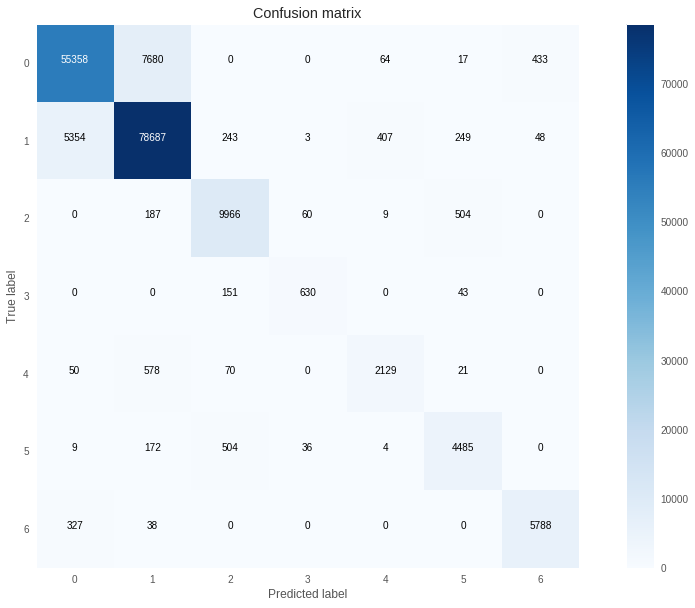

In [132]:
cnf_matrix = confusion_matrix(Y_test,preds_max_complex)
np.set_printoptions(precision=2)

#print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1,2,3,4,5,6]
plt.figure(figsize=(15, 10))
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.grid('off')
plt.show()